In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# **Read CSV & store it in Dataframe**

In [2]:
df = pd.read_csv('H2HBABBA1361.csv')

# **Shape of the Dataframe**

In [3]:
df.shape

(50000, 19)

# **Display First 5 Rows of Dataframe**

In [4]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200040366,RASTEL co,2019-05-17 00:00:00,2019.0,1.929212e+09,2019-05-01,20190426,20190501,20190516.0,USD,RV,1.0,NaN,2160.31,20190501.0,NAA8,1.929212e+09,0
1,U001,0200707822,PUBLI us,2019-09-18 00:00:00,2019.0,1.929821e+09,2019-09-03,20190903,20190903,20190918.0,USD,RV,1.0,NaN,111586.61,20190903.0,NAA8,1.929821e+09,0
2,CA02,0140104409,LOB co,2019-11-22 00:00:00,2019.0,2.960593e+09,2019-11-11,20191111,20191111,20191121.0,CAD,RV,1.0,NaN,65153.44,20191111.0,CA10,2.960593e+09,0
3,U001,200390794,CASH-W corporation,NaN,2020.0,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,USD,RV,1.0,NaN,21634.82,20200506.0,NAA8,1.930867e+09,1
4,U001,0200418007,AM corporation,NaN,2020.0,1.930805e+09,2020-04-22,20200420,20200422,20200626.0,USD,RV,1.0,NaN,31.56,20200422.0,NAGD,1.930805e+09,1


# **Display Last 5 Rows of Dataframe**

In [5]:
df.tail(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200875006,KROGER associates,2019-04-26 00:00:00,2019.0,1.929136e+09,2019-04-11,20190412,20190411,20190426.0,USD,RV,1.0,NaN,184407.56,20190411.0,NAA8,1.929136e+09,0
49996,U001,0200769623,WAL-MAR foundation,2019-11-04 00:00:00,2019.0,1.930037e+09,2019-10-24,20191021,20191024,20191108.0,USD,RV,1.0,NaN,16175.40,20191024.0,NAH4,1.930037e+09,0
49997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930802e+09,2020-04-21,20200420,20200421,20200506.0,USD,RV,1.0,NaN,54791.03,20200421.0,NAH4,1.930802e+09,1
49998,U001,0200759878,SA co,2019-03-11 00:00:00,2019.0,1.928845e+09,2019-02-23,20190222,20190223,20190310.0,USD,RV,1.0,NaN,73799.96,20190223.0,NAH4,1.928845e+09,0
49999,U001,0200865666,RESTAU corp,2019-03-20 00:00:00,2019.0,1.928907e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,11895.36,20190305.0,NAA8,1.928907e+09,0


# **Statistics**

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999500e+04,50000.000000
mean,2019.304320,2.008873e+09,2.019350e+07,2.019353e+07,2.019367e+07,1.0,NaN,3.243631e+04,2.019353e+07,2.008124e+09,0.200000
std,0.460123,2.816167e+08,4.491489e+03,4.477061e+03,4.463724e+03,0.0,NaN,4.026165e+04,4.478179e+03,2.714829e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018032e+07,1.0,NaN,2.700000e-01,2.018031e+07,1.928502e+09,0.000000
25%,2019.000000,1.929341e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.871745e+03,2.019051e+07,1.929341e+09,0.000000
50%,2019.000000,1.929974e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,1.763928e+04,2.019091e+07,1.929974e+09,0.000000
75%,2020.000000,1.930617e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.704053e+04,2.020013e+07,1.930617e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.501474e+06,2.020052e+07,2.960636e+09,1.000000


# **Checking for Non-Null Values**

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# **Number of NULL Values**

In [8]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

# **Dropping columns with ALL NULL values**

In [9]:
df.dropna(how='all', axis=1, inplace=True)

In [10]:
df.shape
#Dropped area_business

(50000, 18)

# **Drop the Rows who have invoice_id as NULL**

In [11]:
df.dropna(subset=['invoice_id'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [13]:
df["isOpen"].value_counts()

0    39995
1    10000
Name: isOpen, dtype: int64

# **Checking for Unique Values in Each Column**

In [14]:
n = df.nunique(axis=0)
print(n)

business_code                 6
cust_number                1431
name_customer              4190
clear_date                  400
buisness_year                 2
doc_id                    48760
posting_date                502
document_create_date        505
document_create_date.1      502
due_in_date                 550
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44252
baseline_create_date        507
cust_payment_terms           70
invoice_id                48760
isOpen                        2
dtype: int64


# **As there is only 1 unique value in document type and posting_id so we can drop these**

In [15]:
df.drop(['document type', 'posting_id'], axis = 1, inplace=True)

In [16]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Searching for Duplicate Columns**

In [17]:
duplicate = []
for i in range (df.shape[1]):
    col = df.iloc[:,i]
    for j in range (i+1, df.shape[1]):
        othercol = df.iloc[:,j]
        if(col.equals(othercol)):
            duplicate.append(df.columns[i]);
            print("Duplicate with : "+df.columns[j])
print(duplicate)

Duplicate with : invoice_id
['doc_id']


In [18]:
df.drop(duplicate, axis = 1, inplace=True) 

In [19]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Date-Time Conversion**

In [20]:
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date'].head(5)

0   2019-04-26
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-20
Name: document_create_date, dtype: datetime64[ns]

In [21]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head(5)

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: document_create_date.1, dtype: datetime64[ns]

In [22]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2019-05-16
1   2019-09-18
2   2019-11-21
3   2020-05-21
4   2020-06-26
Name: due_in_date, dtype: datetime64[ns]

In [23]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: baseline_create_date, dtype: datetime64[ns]

In [24]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2019-05-17
1   2019-09-18
2   2019-11-22
3          NaT
4          NaT
Name: clear_date, dtype: datetime64[ns]

In [25]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2019-05-01
1   2019-09-03
2   2019-11-11
3   2020-05-06
4   2020-04-22
Name: posting_date, dtype: datetime64[ns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49995 entries, 0 to 49994
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49995 non-null  object        
 1   cust_number             49995 non-null  object        
 2   name_customer           49995 non-null  object        
 3   clear_date              39995 non-null  datetime64[ns]
 4   buisness_year           49995 non-null  float64       
 5   posting_date            49995 non-null  datetime64[ns]
 6   document_create_date    49995 non-null  datetime64[ns]
 7   document_create_date.1  49995 non-null  datetime64[ns]
 8   due_in_date             49995 non-null  datetime64[ns]
 9   invoice_currency        49995 non-null  object        
 10  total_open_amount       49995 non-null  float64       
 11  baseline_create_date    49995 non-null  datetime64[ns]
 12  cust_payment_terms      49995 non-null  object

# **Again Checking for Duplicate Columns** 

In [27]:
duplicate = []
for x in range (df.shape[1]):
    col = df.iloc[:,x]
    for y in range (x+1, df.shape[1]):
        othercol = df.iloc[:,y]
        if(col.equals(othercol)):
            duplicate.append(df.columns[x]);
            print("Duplicate with : "+df.columns[y])
print(duplicate)

Duplicate with : document_create_date.1
['posting_date']


In [28]:
df.drop(duplicate, axis = 1, inplace=True) 

In [29]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
document_create_date
document_create_date.1
due_in_date
invoice_currency
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


# **Between document_create_date & document_create_date.1, we can drop one of them**

In [30]:
# Due to Quasi-constant we can drop one of them
df.drop(columns=['document_create_date'],inplace=True)

# **Invoice Id is unique for each transaction and don't affect the sales, so we drop it**

In [31]:
df.drop(columns=['invoice_id'],inplace=True)

In [32]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1


# **Dropping the Duplicate Rows**

In [33]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48733,U001,0200875006,KROGER associates,2019-04-26,2019.0,2019-04-11,2019-04-26,USD,184407.56,2019-04-11,NAA8,0
48734,U001,0200769623,WAL-MAR foundation,2019-11-04,2019.0,2019-10-24,2019-11-08,USD,16175.40,2019-10-24,NAH4,0
48735,U001,0200769623,WAL-MAR llc,NaT,2020.0,2020-04-21,2020-05-06,USD,54791.03,2020-04-21,NAH4,1
48736,U001,0200759878,SA co,2019-03-11,2019.0,2019-02-23,2019-03-10,USD,73799.96,2019-02-23,NAH4,0


# **Target Variable**
# *Our Model can't Predict Dates so target column will not be clear_date.*
# *We will add delay column as target column where delay = due_in_date - clear_date*

In [34]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [35]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200040366,RASTEL co,2019-05-17,2019.0,2019-05-01,2019-05-16,USD,2160.31,2019-05-01,NAA8,0,1.0
1,U001,0200707822,PUBLI us,2019-09-18,2019.0,2019-09-03,2019-09-18,USD,111586.61,2019-09-03,NAA8,0,0.0
2,CA02,0140104409,LOB co,2019-11-22,2019.0,2019-11-11,2019-11-21,CAD,65153.44,2019-11-11,CA10,0,1.0
3,U001,200390794,CASH-W corporation,NaT,2020.0,2020-05-06,2020-05-21,USD,21634.82,2020-05-06,NAA8,1,NaN
4,U001,0200418007,AM corporation,NaT,2020.0,2020-04-22,2020-06-26,USD,31.56,2020-04-22,NAGD,1,NaN


# **Sorting with respect to document_create_date.1**

In [36]:
#So that future date will not be included in Train Dataset
df.sort_values(by='document_create_date.1',inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,11582.37,2018-12-30,NAH4,0,-5.0
1,U001,0200741174,M B trust,2019-02-01,2019.0,2018-12-30,2019-01-31,USD,22776.00,2018-12-30,NA32,0,1.0
2,U001,0200726979,BJ'S trust,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,33.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,8286.44,2018-12-30,NAH4,0,-5.0
4,U001,0100031704,DELHAIZE in,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,81196.56,2018-12-30,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48733,U001,0200762950,HAR corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,136025.60,2020-05-13,NAA8,1,NaN
48734,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1,NaN
48735,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1,NaN
48736,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1,NaN


# **Splitting - Creating test set on NULL clear_date**

In [38]:
testData = df[df.clear_date.isnull()].reset_index()
testData.drop(columns=['index'], inplace=True)
testData

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U013,0100048689,UNISUP foundation,NaT,2020.0,2020-02-27,2020-03-28,USD,33965.02,2020-02-27,NAVE,1,NaN
1,U001,0200769623,WAL-MAR associates,NaT,2020.0,2020-02-27,2020-03-13,USD,60792.77,2020-02-27,NAH4,1,NaN
2,U001,0200726979,BJ'S systems,NaT,2020.0,2020-02-27,2020-03-13,USD,333.59,2020-02-27,NAA8,1,NaN
3,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,24145.01,2020-02-27,NAC6,1,NaN
4,U001,0200096390,D systems,NaT,2020.0,2020-02-27,2020-03-13,USD,40215.45,2020-02-27,NAA8,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,U001,0200762950,HAR corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,136025.60,2020-05-13,NAA8,1,NaN
9672,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1,NaN
9673,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1,NaN
9674,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1,NaN


# **X_Test**

In [39]:
x_test = testData.iloc[:,0:12]
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U013,0100048689,UNISUP foundation,NaT,2020.0,2020-02-27,2020-03-28,USD,33965.02,2020-02-27,NAVE,1
1,U001,0200769623,WAL-MAR associates,NaT,2020.0,2020-02-27,2020-03-13,USD,60792.77,2020-02-27,NAH4,1
2,U001,0200726979,BJ'S systems,NaT,2020.0,2020-02-27,2020-03-13,USD,333.59,2020-02-27,NAA8,1
3,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,24145.01,2020-02-27,NAC6,1
4,U001,0200096390,D systems,NaT,2020.0,2020-02-27,2020-03-13,USD,40215.45,2020-02-27,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9671,U001,0200762950,HAR corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,136025.60,2020-05-13,NAA8,1
9672,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1
9673,CA02,0140105785,SHOPPE in,NaT,2020.0,2020-05-19,2020-05-29,CAD,1373.60,2020-05-19,CA10,1
9674,U001,0200763229,MAINES llc,NaT,2020.0,2020-05-19,2020-06-03,USD,17544.11,2020-05-19,NAA8,1


# **Y_Test**

In [40]:
y_test = testData.iloc[:,-1]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9671   NaN
9672   NaN
9673   NaN
9674   NaN
9675   NaN
Name: delay, Length: 9676, dtype: float64

# **Creating Train Set**

In [41]:
trainData = df[df.clear_date.notnull()].reset_index()
trainData.drop(columns=['index'], inplace=True)
trainData

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,11582.37,2018-12-30,NAH4,0,-5.0
1,U001,0200741174,M B trust,2019-02-01,2019.0,2018-12-30,2019-01-31,USD,22776.00,2018-12-30,NA32,0,1.0
2,U001,0200726979,BJ'S trust,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,33.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,8286.44,2018-12-30,NAH4,0,-5.0
4,U001,0100031704,DELHAIZE in,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,81196.56,2018-12-30,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39057,CA02,0140104392,FLANAG systems,2020-03-10,2020.0,2020-02-27,2020-03-09,CAD,58200.54,2020-02-28,CA10,0,1.0
39058,U001,0200739534,OK,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,29964.80,2020-02-27,NAA8,0,0.0
39059,U001,0200794332,COST trust,2020-03-12,2020.0,2020-02-27,2020-03-13,USD,38586.43,2020-02-27,NAAX,0,-1.0
39060,CA02,0140106408,WAL-M us,2020-03-20,2020.0,2020-02-27,2020-03-09,CAD,2878.29,2020-02-28,CA10,0,11.0


# **Main_Train --> (Train, Validation)**
## Train - For Model Training
## Validation - For Model Tuning

In [42]:
X = trainData.drop(columns = ['delay'])
Y = trainData['delay']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size=0.8)

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((31249, 12), (31249,), (7813, 12), (7813,))

# **EDA**

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31249 entries, 9075 to 34044
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31249 non-null  object        
 1   cust_number             31249 non-null  object        
 2   name_customer           31249 non-null  object        
 3   clear_date              31249 non-null  datetime64[ns]
 4   buisness_year           31249 non-null  float64       
 5   document_create_date.1  31249 non-null  datetime64[ns]
 6   due_in_date             31249 non-null  datetime64[ns]
 7   invoice_currency        31249 non-null  object        
 8   total_open_amount       31249 non-null  float64       
 9   baseline_create_date    31249 non-null  datetime64[ns]
 10  cust_payment_terms      31249 non-null  object        
 11  isOpen                  31249 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1),

## **business_code**
Business Code

In [44]:
X_train['business_code'].value_counts()

U001    28324
CA02     2432
U013      386
U002       98
U005        8
U007        1
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

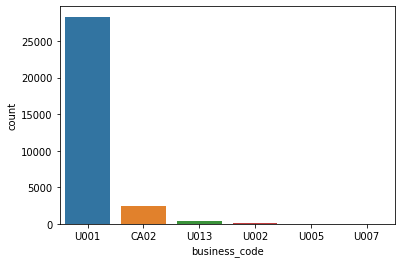

In [45]:
sns.countplot(x = X_train['business_code'])

## **cust_number**
Customer Number given to all the customers

In [46]:
X_train['cust_number'].value_counts()

0200769623    6875
0200726979    1188
0200762301     918
0200759878     840
0200794332     690
              ... 
0100043910       1
100054539        1
0100051489       1
0200803125       1
0100051976       1
Name: cust_number, Length: 1256, dtype: int64

## **name_customer**
Name of the Customer.

In [47]:
X_train['name_customer'].value_counts()

WAL-MAR co             712
WAL-MAR trust          691
WAL-MAR associates     690
WAL-MAR systems        682
WAL-MAR in             677
                      ... 
MASSY D corporation      1
ATLANTA  systems         1
DIS trust                1
PARAM                    1
TRO in                   1
Name: name_customer, Length: 3521, dtype: int64

## **clear_date**
The date on which the customer make the full payment.

In [48]:
X_train['clear_date'].min()

Timestamp('2019-01-03 00:00:00')

In [49]:
X_train['clear_date'].max()

Timestamp('2020-05-21 00:00:00')

In [50]:
diff = (X_train['clear_date'].max() - X_train['clear_date'].min());
print("clear_date ranges between : "+str(diff))

clear_date ranges between : 504 days 00:00:00


In [51]:
#clear_month
clear_month = X_train['clear_date'].dt.month
clear_month.value_counts()

2     3736
3     3198
5     2701
4     2649
12    2590
11    2511
10    2413
7     2411
8     2390
9     2272
1     2221
6     2157
Name: clear_date, dtype: int64

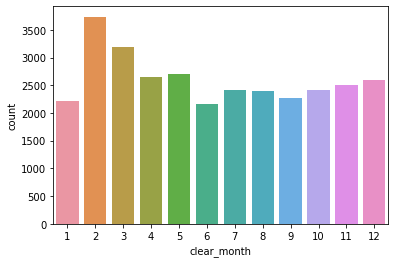

In [52]:
ax = sns.countplot(x = clear_month)
ax.set(xlabel='clear_month', ylabel='count')
plt.show()

# **business_year**
Indicates the year of Clear Date

In [53]:
X_train['buisness_year'].value_counts()

2019.0    27184
2020.0     4065
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='buisness_year', ylabel='count'>

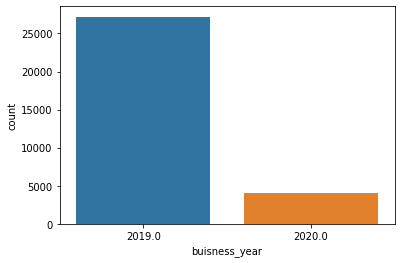

In [54]:
sns.countplot(x = X_train['buisness_year'])

# **document_create_date.1**
The date on which the invoice document was created

In [55]:
X_train["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [56]:
X_train["document_create_date.1"].max()

Timestamp('2020-02-27 00:00:00')

In [57]:
diff = X_train["document_create_date.1"].max() - X_train["document_create_date.1"].min()
diff

Timedelta('424 days 00:00:00')

# **due_in_date**
The last date for payment

In [58]:
X_train['due_in_date'].min()

Timestamp('2018-03-18 00:00:00')

In [59]:
X_train['due_in_date'].max()

Timestamp('2020-06-24 00:00:00')

In [60]:
diff = (X_train['due_in_date'].max() - X_train['due_in_date'].min());
diff

Timedelta('829 days 00:00:00')

In [61]:
due_month = X_train['due_in_date'].dt.month
due_month.value_counts()

2     3881
3     3239
5     2595
4     2582
11    2544
10    2416
12    2364
7     2363
8     2357
6     2322
1     2320
9     2266
Name: due_in_date, dtype: int64

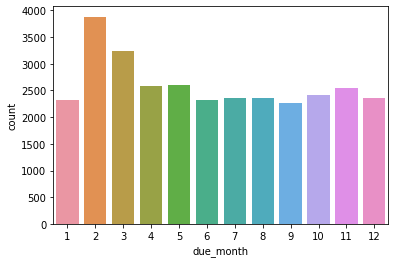

In [62]:
ax = sns.countplot(x = due_month)
ax.set(xlabel='due_month', ylabel='count')
plt.show()

# **invoice_currency**

In [63]:
X_train["invoice_currency"].value_counts()

USD    28817
CAD     2432
Name: invoice_currency, dtype: int64

As there are two currencies, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

# **total_open_amount**

The amount that is to be paid for that invoice

In [64]:
X_train['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count      31249.000000
mean       32343.922137
std        41258.094951
min            0.790000
25%         4679.260000
50%        17283.500000
75%        46589.690000
max      1501474.160000
Name: total_open_amount, dtype: object

# **baseline_create_date**
The date on which the Invoice was created.

In [65]:
count=0
count1=0
for row in range (trainData.shape[0]):
    if(trainData['document_create_date.1'][row] == trainData['baseline_create_date'][row]):
        count = count + 1;
    else:
        count1 = count1 + 1;
print("Number of Similar Dates : "+str(count))
print("Number of Non-Similar Dates : "+str(count1))

Number of Similar Dates : 34769
Number of Non-Similar Dates : 4293


Baseline create date and document create date are same except if the company is Canadian.
It's not that important to our model so we'll drop it

# **cust_payment_terms**

In [66]:
X_train['cust_payment_terms'].value_counts()

NAA8    12629
NAH4     8187
CA10     2365
NAC6     1048
NAM4      858
        ...  
NA8Q        1
CAX2        1
NATV        1
90M7        1
NATM        1
Name: cust_payment_terms, Length: 64, dtype: int64

# **isOpen**
Tells whether a transaction is open or closed

In [67]:
X_train.isOpen.value_counts()

0    31249
Name: isOpen, dtype: int64

# **Delay**
The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have replace the negative values with 0

In [68]:
count=0
for row in range(trainData.shape[0]):
    if (trainData['delay'][row] < 0):
        count = count + 1
print(count)

14328


In [69]:
trainData['delay'] = trainData.delay.apply(lambda x: 0 if x<0 else x)

In [70]:
count=0
for row in range(trainData.shape[0]):
    if (trainData['delay'][row] < 0):
        count = count + 1
print(count)

0


In [71]:
trainData.delay.describe()

count    39062.000000
mean         2.700195
std          9.275545
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        442.000000
Name: delay, dtype: float64

<AxesSubplot:xlabel='delay', ylabel='Density'>

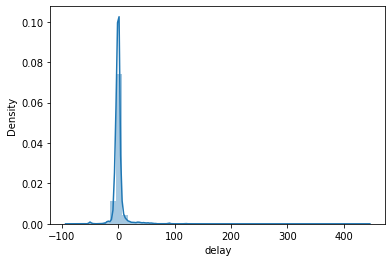

In [72]:
sns.distplot(Y_train)

# **Multivariate Analysis**
### **Relation b/w business_code with invoice_currency**

In [73]:
trainData['invoice_currency'].value_counts()

USD    36045
CAD     3017
Name: invoice_currency, dtype: int64

In [74]:
trainData.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              3017
USD               U001             35430
                  U013               490
                  U002               114
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

## **Delay Bin**

In [75]:
delay_bins = [0,15,30,45,60]
delay_bucket = pd.cut(Y_train, bins = delay_bins)

## **Amount Bin**

In [76]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(X_train['total_open_amount'], bins = amount_bins)

In [77]:
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]"
total_open_amount,,,,
"(0, 5000]",2703,85,76,72
"(5000, 10000]",1256,47,40,29
"(10000, 50000]",5057,244,167,87
"(50000, 100000]",2050,57,16,11
"(100000, 1100000]",951,16,12,7


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

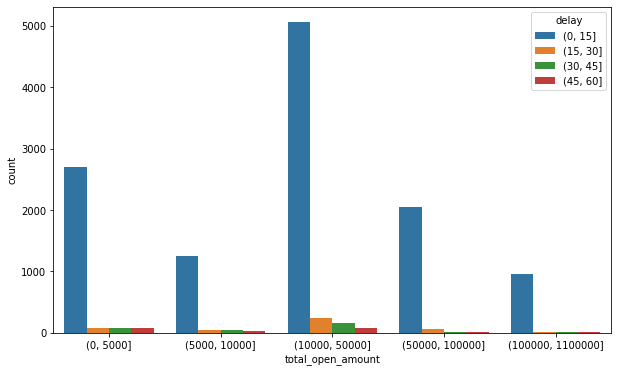

In [78]:
plt.figure(figsize=(10,6))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

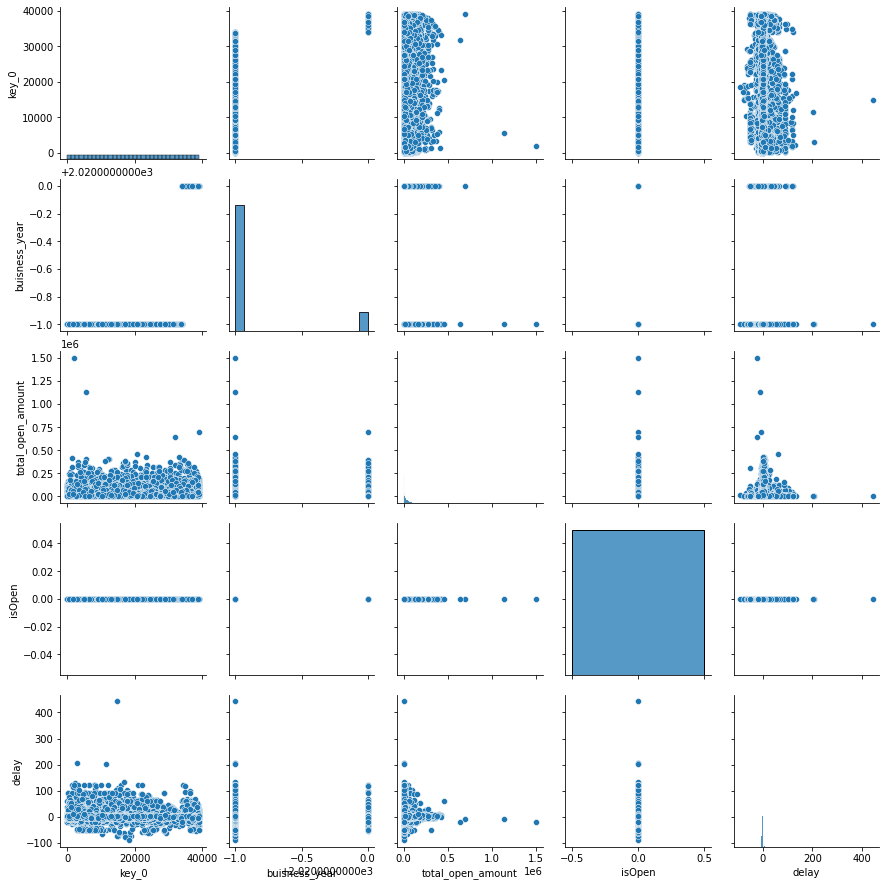

In [79]:
sns.pairplot(X_train.merge(Y_train, on=X_train.index))

# **Feature Engineering**

In [80]:
X_train.drop(columns=[ 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)
X_valid.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)
x_test.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date', 'isOpen'], inplace=True)

In [81]:
X_train.shape, X_valid.shape, x_test.shape

((31249, 7), (7813, 7), (9676, 7))

In [82]:
X_train['cust_num'] = X_train['cust_number'].str.extract('(\d+)')
x_test['cust_num'] = x_test['cust_number'].str.extract('(\d+)')
X_valid['cust_num'] = X_valid['cust_number'].str.extract('(\d+)')
X_train.drop('cust_number',axis=1,inplace=True)
x_test.drop('cust_number',axis=1,inplace=True)
X_valid.drop('cust_number',axis=1,inplace=True)
X_train['cust_num']=X_train['cust_num'].astype(str).astype(float)
x_test['cust_num']=x_test['cust_num'].astype(str).astype(float)
X_valid['cust_num']=X_valid['cust_num'].astype(str).astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31249 entries, 9075 to 34044
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           31249 non-null  object        
 1   clear_date              31249 non-null  datetime64[ns]
 2   document_create_date.1  31249 non-null  datetime64[ns]
 3   due_in_date             31249 non-null  datetime64[ns]
 4   total_open_amount       31249 non-null  float64       
 5   cust_payment_terms      31249 non-null  object        
 6   cust_num                31249 non-null  float64       
dtypes: datetime64[ns](3), float64(2), object(2)
memory usage: 2.9+ MB


In [83]:
#Encoding Business Code
buss_code= LabelEncoder()
buss_code.fit(X_train['business_code'])
X_train['buss_code']=buss_code.transform(X_train['business_code'])
X_valid['buss_code']=buss_code.transform(X_valid['business_code'])
x_test['buss_code']=buss_code.transform(x_test['business_code'])

In [84]:
#Encoding Customer Payment Terms
cpt= LabelEncoder()
cpt.fit(X_train['cust_payment_terms'])
X_train['cpt']=cpt.transform(X_train['cust_payment_terms'])
cpt.fit(x_test['cust_payment_terms'])
x_test['cpt']=cpt.transform(x_test['cust_payment_terms'])
cpt.fit(X_valid['cust_payment_terms'])
X_valid['cpt']=cpt.transform(X_valid['cust_payment_terms'])
X_train.drop('cust_payment_terms',axis=1,inplace=True)
x_test.drop('cust_payment_terms',axis=1,inplace=True)
X_valid.drop('cust_payment_terms',axis=1,inplace=True)

In [85]:
#Document Create Date
X_train["doc_crt_day"] = X_train["document_create_date.1"].dt.day
x_test["doc_crt_day"] = x_test["document_create_date.1"].dt.day
X_valid["doc_crt_day"] = X_valid["document_create_date.1"].dt.day

X_train["doc_crt_month"] = X_train["document_create_date.1"].dt.month
x_test["doc_crt_month"] = x_test["document_create_date.1"].dt.month
X_valid["doc_crt_month"] = X_valid["document_create_date.1"].dt.month

In [86]:
#Due Date
X_train["due_day"] = X_train["due_in_date"].dt.day
x_test["due_day"] = x_test["due_in_date"].dt.day
X_valid["due_day"] = X_valid["due_in_date"].dt.day

X_train["due_month"] = X_train["due_in_date"].dt.month
x_test["due_month"] = x_test["due_in_date"].dt.month
X_valid["due_month"] = X_valid["due_in_date"].dt.month

In [87]:
X_train.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
x_test.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
X_valid.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
X_train.drop('business_code',axis=1,inplace=True)
x_test.drop('business_code',axis=1,inplace=True)
X_valid.drop('business_code',axis=1,inplace=True)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31249 entries, 9075 to 34044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  31249 non-null  float64
 1   cust_num           31249 non-null  float64
 2   buss_code          31249 non-null  int32  
 3   cpt                31249 non-null  int32  
 4   doc_crt_day        31249 non-null  int64  
 5   doc_crt_month      31249 non-null  int64  
 6   due_day            31249 non-null  int64  
 7   due_month          31249 non-null  int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 2.9 MB


In [89]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9676 entries, 0 to 9675
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  9676 non-null   float64
 1   cust_num           9676 non-null   float64
 2   buss_code          9676 non-null   int32  
 3   cpt                9676 non-null   int32  
 4   doc_crt_day        9676 non-null   int64  
 5   doc_crt_month      9676 non-null   int64  
 6   due_day            9676 non-null   int64  
 7   due_month          9676 non-null   int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 529.3 KB


In [90]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 20149 to 32730
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  7813 non-null   float64
 1   cust_num           7813 non-null   float64
 2   buss_code          7813 non-null   int32  
 3   cpt                7813 non-null   int32  
 4   doc_crt_day        7813 non-null   int64  
 5   doc_crt_month      7813 non-null   int64  
 6   due_day            7813 non-null   int64  
 7   due_month          7813 non-null   int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 488.3 KB


# **Feature Selection**

<AxesSubplot:>

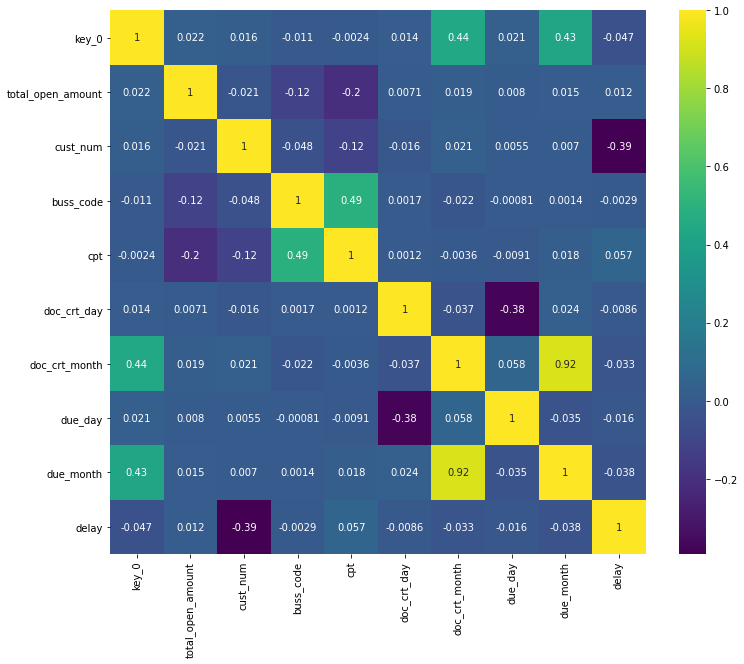

In [91]:
plt.figure(figsize=(12,10))
cor = X_train.merge(Y_train, on=X_train.index).corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month.

In [92]:
X_train = X_train.drop(["due_month"], axis=1).copy()
X_valid = X_valid.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

In [93]:
Y_train=Y_train.apply(lambda x: 0 if x<0 else x)
Y_valid=Y_valid.apply(lambda x: 0 if x<0 else x)

# **Modelling**

In [94]:
base_model=LinearRegression()
base_model.fit(X_train, Y_train)

LinearRegression()

### **Model Validation**

In [95]:
Y_Pred = base_model.predict(X_valid)

In [96]:
mean_squared_error(Y_valid, Y_Pred, squared=False)

8.737705965500322

In [97]:
# creating a DataFrame to store Predicted and actual data
check = pd.DataFrame(zip(Y_Pred , Y_valid),columns=['PredictedData','ActualData'])
check.head()

,PredictedData,ActualData
0,-0.279846,1.0
1,2.381478,0.0
2,8.885014,0.0
3,0.345376,1.0
4,2.742453,0.0


# **Missing Data Prediction**

In [98]:
predicted = base_model.predict(x_test)

In [99]:
predicted = np.around(predicted)
predicted.astype(int)

array([7, 2, 0, ..., 5, 0, 0])

### **Creating a new dataframe**

In [100]:
Col=pd.DataFrame()
Delay=[]
for x in predicted:
    Delay.append(pd.Timedelta(days=x))
delay = pd.Series(Delay,name='delay')

In [101]:
FinalDF = x_test.merge(delay, on=x_test.index )
FinalDF.drop('key_0', axis=1, inplace=True)
FinalDF

,total_open_amount,cust_num,buss_code,cpt,doc_crt_day,doc_crt_month,due_day,delay
0,33965.02,100048689.0,5,38,27,2,28,7 days
1,60792.77,200769623.0,1,27,27,2,13,2 days
2,333.59,200726979.0,1,13,27,2,13,0 days
3,24145.01,200762301.0,1,18,27,2,13,1 days
4,40215.45,200096390.0,1,13,27,2,13,0 days
...,...,...,...,...,...,...,...,...
9671,136025.60,200762950.0,1,13,13,5,28,-1 days
9672,9291.00,200915438.0,1,13,18,5,2,0 days
9673,1373.60,140105785.0,0,4,19,5,29,5 days
9674,17544.11,200763229.0,1,13,19,5,3,0 days


# **Creating the Aging Bucket**

In [102]:
aging_bucket = []
for x in predicted:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
agingBucket = pd.Series(aging_bucket, name="aging_bucket")

In [103]:
FinalDF = FinalDF.merge(agingBucket, on=FinalDF.index )
FinalDF.drop('key_0', axis=1, inplace=True)
FinalDF

,total_open_amount,cust_num,buss_code,cpt,doc_crt_day,doc_crt_month,due_day,delay,aging_bucket
0,33965.02,100048689.0,5,38,27,2,28,7 days,0-15days
1,60792.77,200769623.0,1,27,27,2,13,2 days,0-15days
2,333.59,200726979.0,1,13,27,2,13,0 days,0-15days
3,24145.01,200762301.0,1,18,27,2,13,1 days,0-15days
4,40215.45,200096390.0,1,13,27,2,13,0 days,0-15days
...,...,...,...,...,...,...,...,...,...
9671,136025.60,200762950.0,1,13,13,5,28,-1 days,0-15days
9672,9291.00,200915438.0,1,13,18,5,2,0 days,0-15days
9673,1373.60,140105785.0,0,4,19,5,29,5 days,0-15days
9674,17544.11,200763229.0,1,13,19,5,3,0 days,0-15days


In [104]:
data_list = []
for i in range(FinalDF.shape[0]):
    if FinalDF['delay'][i] <=pd.Timedelta(days=15) :
        data_list.append("0-15days")
    elif FinalDF['delay'][i] <= pd.Timedelta(days=30):
        data_list.append("16-30days")
    elif FinalDF['delay'][i] <= pd.Timedelta(days=45):
        data_list.append("31-45days")
    elif FinalDF['delay'][i] <= pd.Timedelta(days=60):
        data_list.append("46-60days")
    else:
        data_list.append(">60days");
        
FinalDF['aging_bucket'] = data_list

FinalDF['aging_bucket'].value_counts()

0-15days     9556
16-30days     120
Name: aging_bucket, dtype: int64